Generalized Linear Models and Regularization

Jay Urbain, PhD

References:

- Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning
with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4.

- [scikit-learn](http://scikit-learn.org/stable/)

LinearRegression fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form:

$min_w||Xw-y||^2$

This method computes the least squares solution using a singular value decomposition of $X$. If $X$ is a matrix of size $(n, p)$ this method has a cost of $O(n p^2)$, assuming that $n \geq p$.

In [18]:
from sklearn import linear_model
%matplotlib inline 

# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
clf = linear_model.LinearRegression()
Y = [0, 1, 2]
X = [[0, 0], [1, 1], [2, 2]]
clf.fit (X, Y)
print clf.coef_

#plt.scatter([[0, 1, 2], [1, 1], [2, 2]], [0, 1, 2],  color='black')
#plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
#         linewidth=3)
#plt.xticks(())
#plt.yticks(())

#plt.show()

[ 0.5  0.5]


Coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

### Ridge regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$min_w||Xw-y||^2 + \alpha||w||^2$

Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.



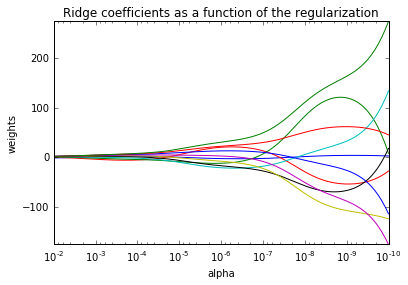

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [20]:
from sklearn import linear_model

#Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
#      normalize=False, random_state=None, solver='auto', tol=0.001)
clf = linear_model.Ridge (alpha = .5)
clf.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
clf.coef_
#array([ 0.34545455,  0.34545455])

array([ 0.34545455,  0.34545455])

### Lasso

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. 

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$min_w\dfrac{1}{2n_{samples}}||Xw-y||^2 + \alpha||w||$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1-norm$ of the parameter vector.
The implementation in the class Lasso uses coordinate descent




In [10]:
from sklearn import linear_model

#Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
#   normalize=False, positive=False, precompute=False, random_state=None,
#   selection='cyclic', tol=0.0001, warm_start=False)
clf = linear_model.Lasso(alpha = 0.1)
clf.fit([[0, 0], [1, 1]], [0, 1])
clf.predict([[1, 1]])

array([ 0.8])

('Coefficients: \n', array([ 938.23786125]))
Residual sum of squares: 2548.07
Variance score: 0.47


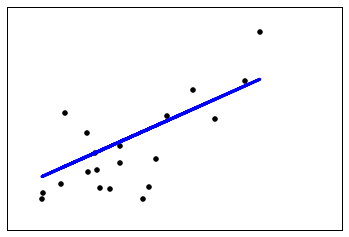

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()